In [9]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("multtest")

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'multtest'

Old packages: 'BH', 'diffobj', 'DT', 'gdtools', 'xfun', 'Matrix'



In [ ]:
library("multtest")
data(golub)
class(golub)

In [11]:
dim(golub)

[1] 3051   38

In [12]:
head(golub)

-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,⋯,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,⋯,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,⋯,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,⋯,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,⋯,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,⋯,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


Note that each column is a sample, and golub[j, i] is the expression level for gene j in tumor mRNA sample i.

There are also gene identifiers and tumor class labels (0 for ALL, 1 for AML).

In [13]:
dim(golub.gnames)

[1] 3051    3

In [14]:
golub.gnames[1:4, ]

36,AFFX-HUMISGF3A/M97935_MA_at (endogenous control),AFFX-HUMISGF3A/M97935_MA_at
37,AFFX-HUMISGF3A/M97935_MB_at (endogenous control),AFFX-HUMISGF3A/M97935_MB_at
38,AFFX-HUMISGF3A/M97935_3_at (endogenous control),AFFX-HUMISGF3A/M97935_3_at
39,AFFX-HUMRGE/M10098_5_at (endogenous control),AFFX-HUMRGE/M10098_5_at


In [15]:
golub.cl

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1

Computing simple test statistics
Computing simple test statistics
The mt.teststat and mt.teststat.num.denum functions provide a convenient way to compute test statistics for each row of a data frame, e.g., two-sample Welch t-statistics, Wilcoxon statistics, F-statistics, paired t-statistics, and block F-statistics.

Let's compute two-sample t-statistics that compares the gene expressions for each gene in the ALL and AML cases. This can be done with the mt.teststat function. The default test is the two-sample Welch t-test.
The mt.teststat and mt.teststat.num.denum functions provide a convenient way to compute test statistics for each row of a data frame, e.g., two-sample Welch t-statistics, Wilcoxon statistics, F-statistics, paired t-statistics, and block F-statistics.

Let's compute two-sample t-statistics that compares the gene expressions for each gene in the ALL and AML cases. This can be done with the mt.teststat function. The default test is the two-sample Welch t-test.

In [16]:
teststat = mt.teststat(golub, golub.cl)

Loading required package: ggplot2



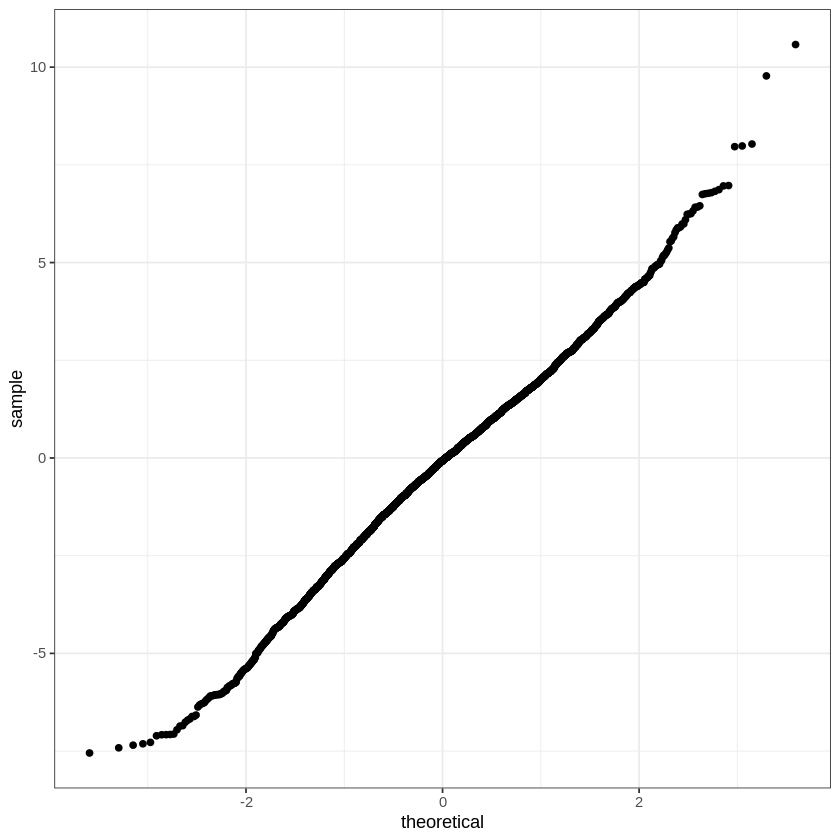

In [17]:
require(ggplot2)
plt = ggplot(data.frame(teststat), aes(sample = teststat)) + stat_qq() + theme_bw()
plt

Question 1 (Multiple Choice) What can we say about those points on the plot that look like outliers?

a. They could correspond to genes whose expression levels differ between the ALL and AML groups

b. They definitely correspond to genes whose expression levels differ between the ALL and AML groups

c. We cannot say anything

We might want to compute the numerators and denominators of the test statistics. These can be done together with the mt.teststat.num.denum() function.

In [18]:
parts = mt.teststat.num.denum(golub, golub.cl)
names(parts)

[1] "teststat.num"   "teststat.denum"

In [19]:
head(parts$teststat.num)

[1]  0.49226310  0.21787189 -0.01993869 -0.16946771 -0.72659579 -0.62997545

In [20]:
head(parts$teststat.denum)

[1] 0.2798229 0.2394571 0.2034022 0.4999595 0.5302981 0.4979837

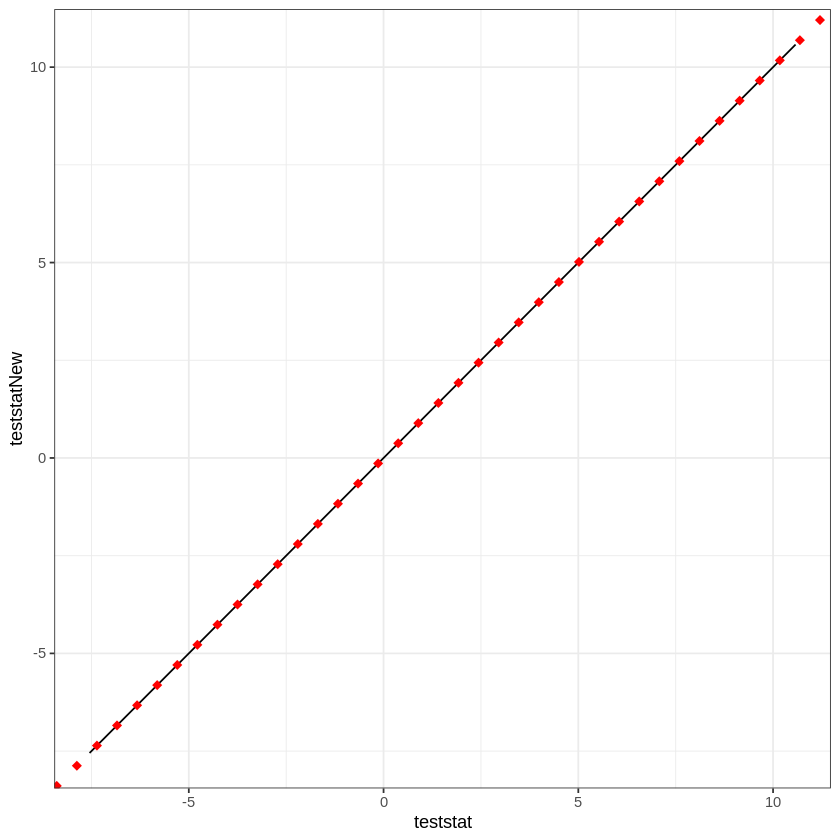

In [21]:
teststatNew = parts$teststat.num/parts$teststat.denum
plt = ggplot(data.frame(teststat, teststatNew), aes(x = teststat, y = teststatNew)) + 
    geom_line() + geom_abline(colour = "red", linetype = "dotted", size = 2) + 
    theme_bw()
plt

Adjusting p-values

The mt.rawp2adjp function computes adjusted p-values for simple multiple testing procedures from a vector of raw (unadjusted) p-values. The procedures include the Bonferroni, Holm (1979), Hochberg (1988), and Sidak procedures for strong control of the family-wise Type I error rate (FWER), and the Benjamini and Hochberg (1995) and Benjamini and Yekutieli (2001) procedures for (strong) control of the false discovery rate (FDR). First we will compute raw nominal two-sided p-values. For this data, we'll assume that it's safe to use a standard normal distribution for the 3,051 test statistics.

In [22]:
rawp = 2 * (1 - pnorm(abs(teststat)))

In [23]:
procedures = c("Bonferroni", "Holm", "Hochberg", "SidakSS", "SidakSD", "BH", 
    "BY")
adjusted = mt.rawp2adjp(rawp, procedures)
adjusted$adjp[1:10, ]

rawp,Bonferroni,Holm,Hochberg,SidakSS,SidakSD,BH,BY
0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8.881784e-16,2.709832e-12,2.708056e-12,2.708056e-12,2.709832e-12,2.708056e-12,9.032775e-13,7.768732e-12
1.332268e-15,4.064749e-12,4.060752e-12,4.060752e-12,4.064749e-12,4.060752e-12,9.484413e-13,8.157168e-12
1.554312e-15,4.742207e-12,4.735989e-12,4.735989e-12,4.742207e-12,4.735989e-12,9.484413e-13,8.157168e-12
4.418688e-14,1.348142e-10,1.345932e-10,1.345932e-10,1.348142e-10,1.345932e-10,2.246903e-11,1.932472e-10
1.207923e-13,3.685372e-10,3.678124e-10,3.678124e-10,3.685372e-10,3.678124e-10,5.264817e-11,4.528061e-10
2.009504e-13,6.130996e-10,6.116929e-10,6.116929e-10,6.130996e-10,6.116929e-10,7.663745e-11,6.591283e-10
2.606804e-13,7.953358e-10,7.932504e-10,7.932504e-10,7.953358e-10,7.932504e-10,8.837064e-11,7.600409e-10
3.419487e-13,1.043285e-09,1.040208e-09,1.040208e-09,1.043285e-09,1.040208e-09,1.043285e-10,8.972885e-10


The results are stored in increasing order of the raw p-values. To display them based on the original data order, use

In [24]:
adjusted$adj[order(adjusted$index)[1:10], ]

rawp,Bonferroni,Holm,Hochberg,SidakSS,SidakSD,BH,BY
0.07854436,1,1,0.9998371,1,1,0.1819581,1
0.36289759,1,1,0.9998371,1,1,0.5354583,1
0.92191171,1,1,0.9998371,1,1,0.9590019,1
0.73463771,1,1,0.9998371,1,1,0.8385259,1
0.17063542,1,1,0.9998371,1,1,0.3187987,1
0.20585260,1,1,0.9998371,1,1,0.3617836,1
0.47019947,1,1,0.9998371,1,1,0.6378740,1
0.59364760,1,1,0.9998371,1,1,0.7374670,1
0.98666904,1,1,0.9998371,1,1,0.9931796,1
0.89267891,1,1,0.9998371,1,1,0.9428699,1


We can also adjust the p-values with permutations using the mt.maxT() and mt.minP() functions. From the vignette: compute permutation adjusted p-values for the maxT and minP step-down multiple testing procedure described in Westfall and Young (1993). These procedure provide strong control of the FWER and also incorporate the joint dependence structure between the test statistics. There are thus in general less conservative than the standard Bonferroni procedure. The permutation algorithm for the maxT and minP procedures is described in Ge et al. (2003).

In [25]:
resT = mt.maxT(golub, golub.cl, B = 10000)

b=100	b=200	b=300	b=400	b=500	b=600	b=700	b=800	b=900	b=1000	
b=1100	b=1200	b=1300	b=1400	b=1500	b=1600	b=1700	b=1800	b=1900	b=2000	
b=2100	b=2200	b=2300	b=2400	b=2500	b=2600	b=2700	b=2800	b=2900	b=3000	
b=3100	b=3200	b=3300	b=3400	b=3500	b=3600	b=3700	b=3800	b=3900	b=4000	
b=4100	b=4200	b=4300	b=4400	b=4500	b=4600	b=4700	b=4800	b=4900	b=5000	
b=5100	b=5200	b=5300	b=5400	b=5500	b=5600	b=5700	b=5800	b=5900	b=6000	
b=6100	b=6200	b=6300	b=6400	b=6500	b=6600	b=6700	b=6800	b=6900	b=7000	
b=7100	b=7200	b=7300	b=7400	b=7500	b=7600	b=7700	b=7800	b=7900	b=8000	
b=8100	b=8200	b=8300	b=8400	b=8500	b=8600	b=8700	b=8800	b=8900	b=9000	
b=9100	b=9200	b=9300	b=9400	b=9500	b=9600	b=9700	b=9800	b=9900	b=10000	


In [26]:
names(resT)

[1] "index"    "teststat" "rawp"     "adjp"

In [27]:
head(resT$teststat)

[1] 10.577748  9.775847  8.032939  7.983260  7.965528 -7.548348

The p-values are sorted in decreasing order of the absolute values of the test statistics.

Question 4 (Multiple Response) Which of the following commands get the p-values in the original data order?

a) resT$rawp[order(resT$index)]

b) resT$adjp[order(resT$index)]

c) resT$rawp[sort(resT$index)]

The functions mt.sample.teststat and mt.sample.rawp can be used to investigate the permutation distribution of test statistics and raw p-values. For example,

In [28]:
perms = as.numeric(mt.sample.teststat(golub[1, ], golub.cl, B = 10000))

gives a vector of 10,000 permutation test statistics for gene 1. Look at the histogram:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



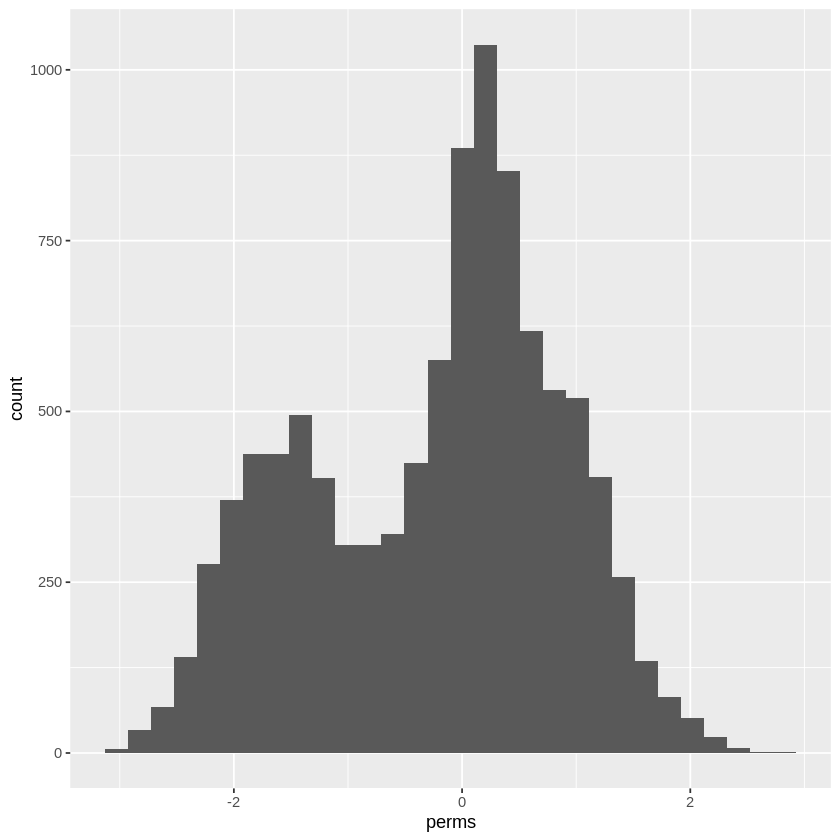

In [29]:
plt = ggplot(data.frame(perms), aes(x = perms)) + stat_bin(position = "identity")
plt

In [30]:
resT = mt.maxT(matrix(golub[1, ], nrow = 1), golub.cl, B = 10000)
resT$rawp

b=100	b=200	b=300	b=400	b=500	b=600	b=700	b=800	b=900	b=1000	
b=1100	b=1200	b=1300	b=1400	b=1500	b=1600	b=1700	b=1800	b=1900	b=2000	
b=2100	b=2200	b=2300	b=2400	b=2500	b=2600	b=2700	b=2800	b=2900	b=3000	
b=3100	b=3200	b=3300	b=3400	b=3500	b=3600	b=3700	b=3800	b=3900	b=4000	
b=4100	b=4200	b=4300	b=4400	b=4500	b=4600	b=4700	b=4800	b=4900	b=5000	
b=5100	b=5200	b=5300	b=5400	b=5500	b=5600	b=5700	b=5800	b=5900	b=6000	
b=6100	b=6200	b=6300	b=6400	b=6500	b=6600	b=6700	b=6800	b=6900	b=7000	
b=7100	b=7200	b=7300	b=7400	b=7500	b=7600	b=7700	b=7800	b=7900	b=8000	
b=8100	b=8200	b=8300	b=8400	b=8500	b=8600	b=8700	b=8800	b=8900	b=9000	
b=9100	b=9200	b=9300	b=9400	b=9500	b=9600	b=9700	b=9800	b=9900	b=10000	


[1] 0.1385

The mt.reject function
The function mt.reject returns the identity and number of rejected hypotheses for several multiple testing procedures and different nominal Type I error rates.

We demonstrate with the golub data by first computing the p-values for all the genes:

In [31]:
resT = mt.maxT(golub, golub.cl, B = 10000)

b=100	b=200	b=300	b=400	b=500	b=600	b=700	b=800	b=900	b=1000	
b=1100	b=1200	b=1300	b=1400	b=1500	b=1600	b=1700	b=1800	b=1900	b=2000	
b=2100	b=2200	b=2300	b=2400	b=2500	b=2600	b=2700	b=2800	b=2900	b=3000	
b=3100	b=3200	b=3300	b=3400	b=3500	b=3600	b=3700	b=3800	b=3900	b=4000	
b=4100	b=4200	b=4300	b=4400	b=4500	b=4600	b=4700	b=4800	b=4900	b=5000	
b=5100	b=5200	b=5300	b=5400	b=5500	b=5600	b=5700	b=5800	b=5900	b=6000	
b=6100	b=6200	b=6300	b=6400	b=6500	b=6600	b=6700	b=6800	b=6900	b=7000	
b=7100	b=7200	b=7300	b=7400	b=7500	b=7600	b=7700	b=7800	b=7900	b=8000	
b=8100	b=8200	b=8300	b=8400	b=8500	b=8600	b=8700	b=8800	b=8900	b=9000	
b=9100	b=9200	b=9300	b=9400	b=9500	b=9600	b=9700	b=9800	b=9900	b=10000	


In [32]:
ord = order(resT$index)
rawp = resT$rawp[ord]
maxT = resT$adjp[ord]
teststat = resT$teststat

In [33]:
mt.reject(cbind(rawp, maxT), seq(0, 1, 0.1))$r

,rawp,maxT
0,0,0
0.1,1324,119
0.2,1661,150
0.3,1900,178
0.4,2090,202
0.5,2263,237
0.6,2441,265
0.7,2611,311
0.8,2755,354
0.9,2893,409


In [34]:
which = mt.reject(cbind(rawp, maxT), 0.01)$which[, 2]
golub.gnames[which, 2]

[1] "CYSTATIN A"                                                                                                     
 [2] "Macmarcks"                                                                                                      
 [3] "SPTAN1 Spectrin, alpha, non-erythrocytic 1 (alpha-fodrin)"                                                      
 [4] "IEF SSP 9502 mRNA"                                                                                              
 [5] "INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION PROTEIN MCL1"                                                     
 [6] "RB1 Retinoblastoma 1 (including osteosarcoma)"                                                                  
 [7] "Inducible protein mRNA"                                                                                         
 [8] "LYN V-yes-1 Yamaguchi sarcoma viral related oncogene homolog"                                                   
 [9] "CD33 CD33 antigen (differentiation antigen)"                                                                    
[10] "CST3 Cystatin C (amyloid angiopathy and cerebral hemorrhage)"                                                   
[11] "FAH Fumarylacetoacetate"                                                                                        
[12] "CTSD Cathepsin D (lysosomal aspartyl protease)"                                                                 
[13] "ACADM Acyl-Coenzyme A dehydrogenase, C-4 to C-12 straight chain"                                                
[14] "CCND3 Cyclin D3"                                                                                                
[15] "HKR-T1"                                                                                                         
[16] "Cytoplasmic dynein light chain 1 (hdlc1) mRNA"                                                                  
[17] "Leukotriene C4 synthase (LTC4S) gene"                                                                           
[18] "Putative enterocyte differentiation promoting factor mRNA, partial cds"                                         
[19] "Lysophospholipase homolog (HU-K5) mRNA"                                                                         
[20] "GB DEF = Homeodomain protein HoxA9 mRNA"                                                                        
[21] "PLECKSTRIN"                                                                                                     
[22] "IRF2 Interferon regulatory factor 2"                                                                            
[23] "VIL2 Villin 2 (ezrin)"                                                                                          
[24] "ME491  gene extracted from H.sapiens gene for Me491/CD63 antigen"                                               
[25] "RETINOBLASTOMA BINDING PROTEIN P48"                                                                             
[26] "T-COMPLEX PROTEIN 1, GAMMA SUBUNIT"                                                                             
[27] "Zyxin"                                                                                                          
[28] "LEPR Leptin receptor"                                                                                           
[29] "TOP2B Topoisomerase (DNA) II beta (180kD)"                                                                      
[30] "C-myb gene extracted from Human (c-myb) gene, complete primary cds, and five complete alternatively spliced cds"
[31] "APLP2 Amyloid beta (A4) precursor-like protein 2"                                                               
[32] "TCRA T cell receptor alpha-chain"                                                                               
[33] "Interleukin 8 (IL8) gene"                                                                                       
[34] "INTERLEUKIN-8 PRECURSOR"                                            

(a) Gives genes with maxT p-values less than or equal to 0.01

(b) Gives genes with maxT p-values strictly less than 0.01

© Gives genes with maxT p-values greater than or equal to 0.01

(d) Gives genes with maxT p-values strictly greater than 0.01

The mt.plot() function
The mt.plot function produces a number of graphical summaries for the results of multiple testing procedures and their corresponding adjusted p-values. To produce plots of sorted permutation unadjusted p-values and adjusted p-values for the Bonferroni, maxT, Benjamini and Hochberg, and Benjamini and Yekutieli procedures use

In [35]:
res = mt.rawp2adjp(rawp, c("Bonferroni", "BH", "BY"))
adjp = res$adjp[order(res$index), ]
allp = cbind(adjp, maxT)
dimnames(allp)[[2]] = c(dimnames(adjp)[[2]], "maxT")
procs = dimnames(allp)[[2]]
procs = procs[c(1, 2, 5, 3, 4)]
cols = c(1, 2, 3, 5, 6)
ltypes = c(1, 2, 2, 3, 3)

For plotting adjusted p-values vs test statistics:

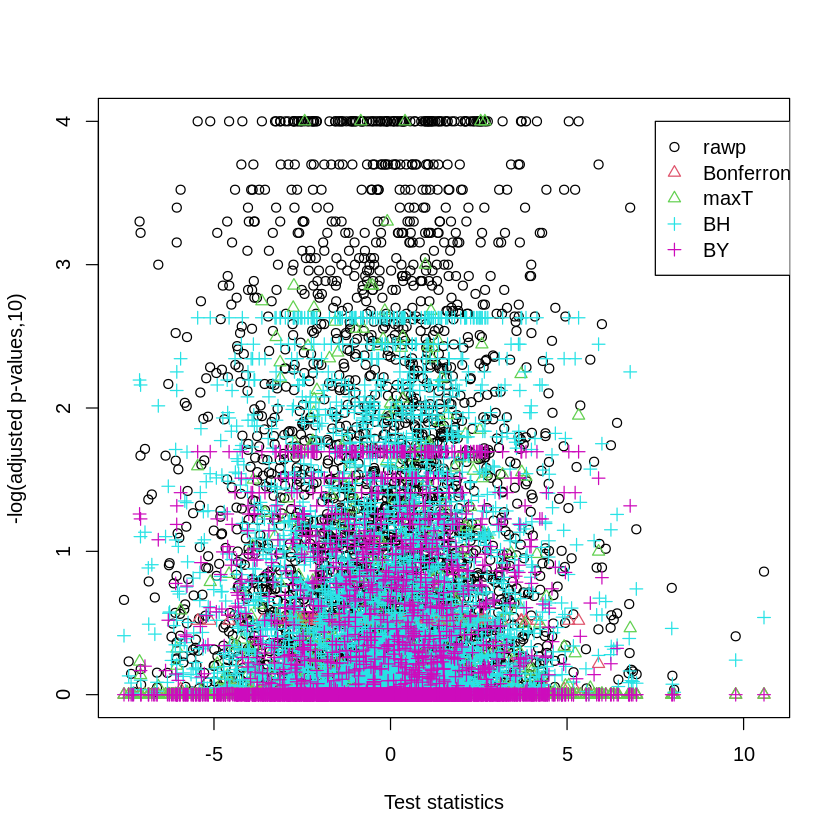

In [36]:
mt.plot(allp[, procs], teststat, plottype = "pvst", logscale = TRUE, proc = procs, 
    leg = c(7.5, 4), pch = ltypes, col = cols)